<a href="https://colab.research.google.com/github/AlekseevaTatiana23/Machine-learning/blob/main/HT6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Работа с данными. Домашнее задание


## Задача
Имеется набор данных покупателей супермаркета. Проведите анализ и очистку этих данных.

### Описание данных

Дан файл Mall_Customers.csv, содержащий следующие данные по покупателям сети супермаркетов:
- CustomerID — идентификатор покупателя.
- Genre – пол покупателя.
- Age – возраст покупателя.
- Annual Income (k\$) – годовой доход покупателя, тысяч $.
- Spending Score (1–100) – рейтинг покупателя, целевая переменная.

### Задание 1

Загрузите данные из файла `Mall_Customers.csv` в ноутбук и выведите первые пять строк на экран.

In [1]:
import pandas as pd

# Загрузка данных из файла
data = pd.read_csv('Mall_Customers.csv')

# Вывод первых пяти строк
print(data.head())


   CustomerID   Genre   Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male  19.0                15.0                      39
1           2    Male   NaN                 NaN                      81
2           3  Female   NaN                16.0                       6
3           4  Female  23.0                16.0                      77
4           5  Female  31.0                17.0                      40


### Задание 2

Проведите разведочный анализ загруженных данных. Обязательные атрибуты для анализа:
- количество пропусков в каждом признаке;
- распределения признаков;
- возможные выбросы или аномалии.

Анализ дополнительных атрибутов и свойств данных приветствуется. Используйте средства визуализации там, где это необходимо.

По результатам анализа сделайте выводы о свойствах отдельных признаков и качестве данных в целом.

Названия колонок: Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')
Обновленные названия колонок: Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


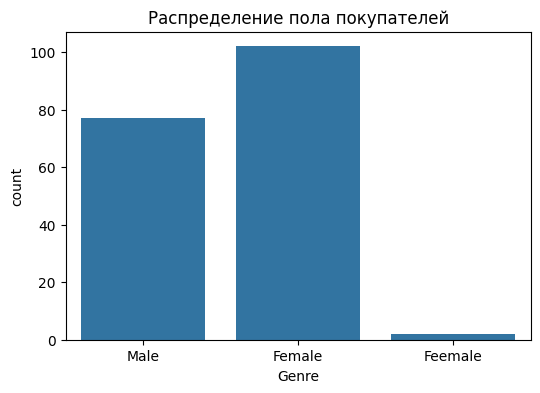

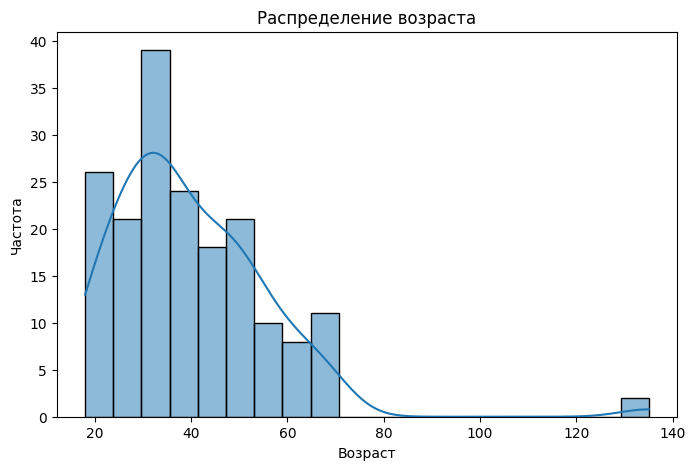

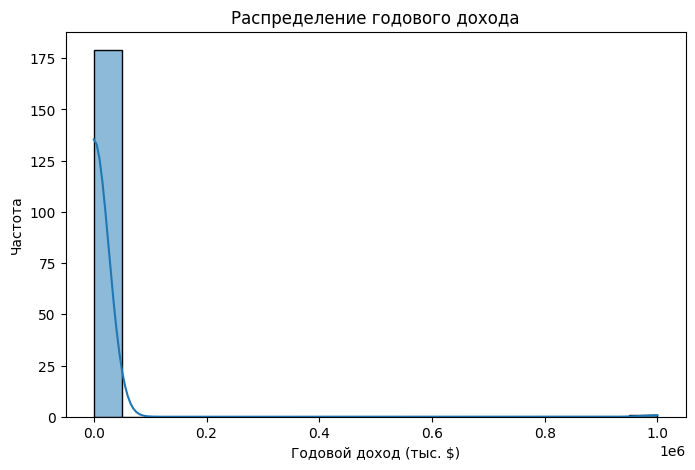

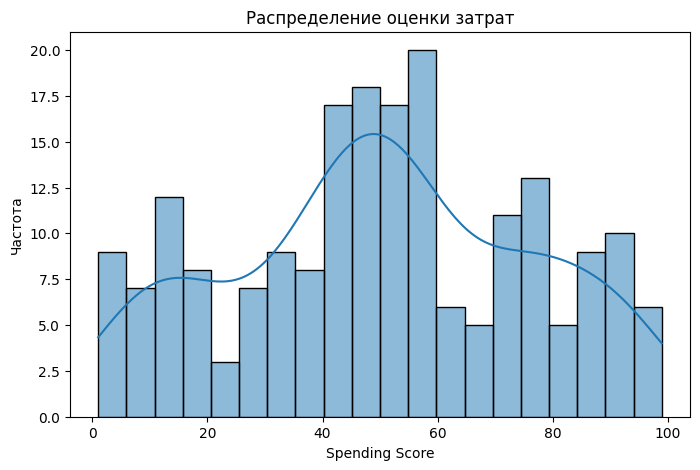

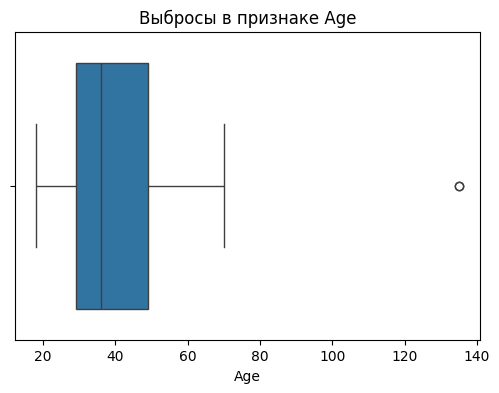

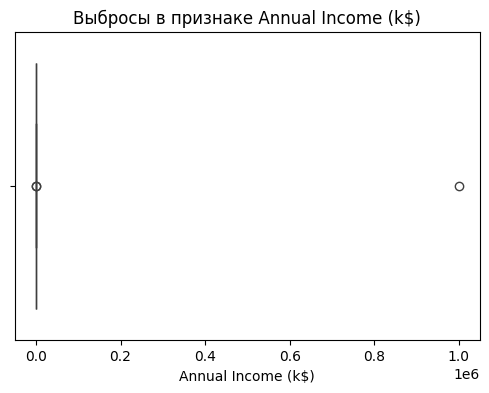

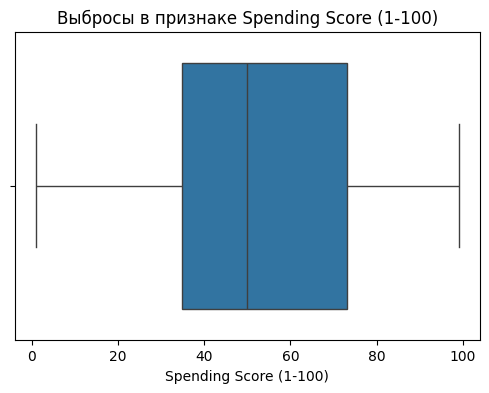

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
data = pd.read_csv('Mall_Customers.csv')

# Проверка названий колонок
print("Названия колонок:", data.columns)

# Удаление лишних пробелов в названиях
data.columns = data.columns.str.strip()

# Проверка после очистки
print("Обновленные названия колонок:", data.columns)

# Пример анализа для признаков с правильными названиями
# Пол
plt.figure(figsize=(6,4))
sns.countplot(x='Genre', data=data)
plt.title('Распределение пола покупателей')
plt.show()

# Возраст
plt.figure(figsize=(8,5))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Распределение возраста')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.show()

# Годовой доход
plt.figure(figsize=(8,5))
sns.histplot(data['Annual Income (k$)'], bins=20, kde=True)
plt.title('Распределение годового дохода')
plt.xlabel('Годовой доход (тыс. $)')
plt.ylabel('Частота')
plt.show()

# Оценка затрат (проверьте название)
# Предположим, что название стало 'Spending Score (1-100)'
# Замените на актуальное, полученное из print(data.columns)
plt.figure(figsize=(8,5))
sns.histplot(data['Spending Score (1-100)'], bins=20, kde=True)
plt.title('Распределение оценки затрат')
plt.xlabel('Spending Score')
plt.ylabel('Частота')
plt.show()

# Аналогично для boxplot
for feature in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=data[feature])
    plt.title(f'Выбросы в признаке {feature}')
    plt.show()


### Задание 3

Разделите данные на обучающую и тестовую выборки в пропорции 80:20. Здесь и далее используйте random_state = 1.

In [5]:
from sklearn.model_selection import train_test_split

# Предположим, что ваши признаки находятся в переменной X, а целевая переменная — в y.
# Например, если целевая переменная — 'Spending Score (1-100)', а признаки — остальные столбцы:

# Определите признаки и целевую переменную
X = data.drop('Spending Score (1-100)', axis=1)
y = data['Spending Score (1-100)']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

# Проверка размеров
print(f'Обучающая выборка: {X_train.shape}, {y_train.shape}')
print(f'Тестовая выборка: {X_test.shape}, {y_test.shape}')


Обучающая выборка: (160, 4), (160,)
Тестовая выборка: (40, 4), (40,)


### Задание 4

Заполните пропуски в признаках в обучающей выборке с использованием инструментов sklearn. Для каждого признака выберите и аргументируйте стратегию заполнения пропусков.

Для заполнения пропусков в признаках в обучающей выборке рекомендуется использовать класс SimpleImputer из sklearn.impute. Выбор стратегии зависит от типа признака и его распределения:

Числовые признаки (например, возраст, доход):

Стратегия: среднее (mean) или медиана (median).
Обоснование: Среднее чувствительно к выбросам, а медиана более устойчива. Обычно для признаков с наличием выбросов предпочтительнее использовать медиану.
Категориальные признаки (например, пол, город):

Стратегия: наиболее частое значение (most_frequent).
Обоснование: Заменяет пропуски на наиболее распространенное значение, что логично для категориальных данных.

In [7]:
from sklearn.impute import SimpleImputer

# Получение признаков по типам автоматически
numeric_features = X_train.select_dtypes(include=['number']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Создаём импутеры
numeric_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Обучение и заполнение пропусков
X_train[numeric_features] = numeric_imputer.fit_transform(X_train[numeric_features])
X_train[categorical_features] = categorical_imputer.fit_transform(X_train[categorical_features])

Для признаков с выбросами лучше использовать median.
Для признаков с редкими категориями — most_frequent.
В случае, если данные имеют очень специфическую distribюцию, можно рассмотреть стратегии с constant (заполнение постоянным значением).

### Задание 5

Найдите выбросы в признаках обучающей выборки. Замените выбросы, если таковые имеются, и аргументируйте выбор метода поиска выбросов.


Для поиска выбросов в признаках обучающей выборки можно использовать несколько методов. Один из распространенных — это межквартильный диапазон (IQR, Interquartile Range). Этот метод хорошо подходит для числовых признаков, поскольку он не чувствителен к выбросам и основан на статистических характеристиках данных.

Почему выбираем метод IQR:
Он не зависит от распределения данных.
Прост в реализации.
Надежно выявляет экстремальные значения, выходящие за рамки межквартильного диапазона.
Как определить выбросы с помощью IQR:
Рассчитать первый квартиль (Q1, 25-й перцентиль) и третий квартиль (Q3, 75-й перцентиль) для признака.
Вычислить межквартильный размах: IQR = Q3 - Q1.
Определить границы выбросов:
Нижняя граница: Q1 - 1.5 * IQR
Верхняя граница: Q3 + 1.5 * IQR
Значения, выходящие за эти границы, считаются выбросами.

In [8]:
import numpy as np

# Предположим, что у вас есть обучающая выборка X_train
# Получите числовые признаки
numeric_features = X_train.select_dtypes(include=['number']).columns

for feature in numeric_features:
    Q1 = X_train[feature].quantile(0.25)
    Q3 = X_train[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Найдём выбросы
    outliers = (X_train[feature] < lower_bound) | (X_train[feature] > upper_bound)

    # Заменяем выбросы на границы
    X_train.loc[outliers, feature] = np.where(
        X_train.loc[outliers, feature] < lower_bound,
        lower_bound,
        upper_bound
    )


Мы заменяем выбросы на границы, чтобы сохранить размер выборки и снизить влияние экстремальных значений.
Можно также заменить выбросы на медиану или среднее, в зависимости от целей анализа.

### Задание 6

Нормализуйте численные признаки. Аргументируйте выбор стратегии нормализации для каждого признака.


Нормализация численных признаков — важный этап предобработки данных, особенно для алгоритмов, чувствительных к масштабу признаков (например, методы на основе расстояний, градиентные методы).

Варианты стратегий нормализации:
Масштабирование (StandardScaler) — стандартизация: приводит признаки к распределению со средним 0 и стандартным отклонением 1. Хорошо подходит, если признаки имеют примерно нормальное распределение.
Min-Max масштабирование (MinMaxScaler) — переводит признаки в диапазон [0, 1]. Подходит, если важна интерпретируемость и однородность масштаба.
RobustScaler — использует медиану и межквартильный размах, устойчив к выбросам, подходит, если в данных много выбросов.
Выбор стратегии:
Если признаки примерно нормально распределены, лучше использовать StandardScaler.
Если есть выбросы и распределение неизвестно или сильно скошено — лучше RobustScaler.
Для равномерного диапазона значений — MinMaxScaler.

In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Предположим, что у вас есть список числовых признаков:
numeric_features = X_train.select_dtypes(include=['number']).columns

# Выбор стратегии
scaler = StandardScaler()  # или MinMaxScaler(), RobustScaler()

# Обучение и применение масштабирования
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])

# Для тестовой выборки
X_test[numeric_features] = scaler.transform(X_test[numeric_features])


StandardScaler — подходит, если данные примерно нормально распределены без сильных выбросов.
RobustScaler — предпочтителен при наличии выбросов.
MinMaxScaler — удобен, если важна граница диапазона, например, для алгоритмов, чувствительных к масштабу.

### Задание 7

Закодируйте категориальные признаки в обучающей выборке. Аргументируйте выбор способа кодирования.

Кодирование категориальных признаков — важный этап подготовки данных для большинства моделей машинного обучения. Правильный выбор метода зависит от типа категориальных признаков и требований модели.

Варианты методов кодирования:
One-Hot Encoding (Преобразование в бинарные признаки) — создает отдельный бинарный признак для каждого уникального значения. Подходит для категориальных признаков без порядка (номинальных), особенно если признак не содержит порядка между категориями.
Label Encoding (присвоение числовых меток) — заменяет каждую категорию на уникальное число. Подходит для порядковых признаков, где есть естественный порядок.
Target Encoding / Frequency Encoding — использует информацию о целевой переменной или частотах, подходит для высокоразмерных категориальных признаков.
Выбор метода:
Для номинальных категориальных признаков (без порядка) рекомендуется One-Hot Encoding, чтобы избежать введения ложного порядка.
Для порядковых признаков — Label Encoding, чтобы сохранить порядок.
Для признаков с большим количеством уникальных значений — можно использовать Target или Frequency Encoding, чтобы избежать разрастания признаков.

In [11]:
from sklearn.preprocessing import OneHotEncoder

# Предположим, что у вас есть список категориальных признаков
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns

# Создаем и обучаем кодировщик с учетом версии scikit-learn
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Обучение на обучающей выборке и преобразование
X_train_encoded = encoder.fit_transform(X_train[categorical_features])

# Создаем DataFrame с новым кодированием
import pandas as pd
encoded_cols = encoder.get_feature_names_out(categorical_features)
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_cols, index=X_train.index)

# Объединяем с остальными признаками
X_train_final = pd.concat([X_train.drop(columns=categorical_features), X_train_encoded_df], axis=1)


One-Hot Encoding — обеспечивает независимость категориальных признаков и не предполагает порядка, что важно для большинства моделей.
Использование handle_unknown='ignore' — предотвращает ошибки при наличии новых категорий в тестовой выборке.

### Задание 8
Проведите очистку и подготовку тестовых данных. Используйте препроцессоры и другие инструменты, которые вы уже использовали при подготовке обучающей выборки, без их дополнительной настройки.

In [ ]:
### YOUR CODE HERE ###
